In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("data/pima_indian_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Number  of times pregnant   768 non-null    int64  
 1   Plasma glucose              768 non-null    int64  
 2   Diastolic blood pressure    768 non-null    int64  
 3   Triceps skinfold thickness  768 non-null    int64  
 4   serum insulin               768 non-null    int64  
 5   Body mass index             768 non-null    float64
 6   Diabetes pedigree function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Class                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within ve years.

Fields description follow:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)
grid_3x3


In [3]:
data.head()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

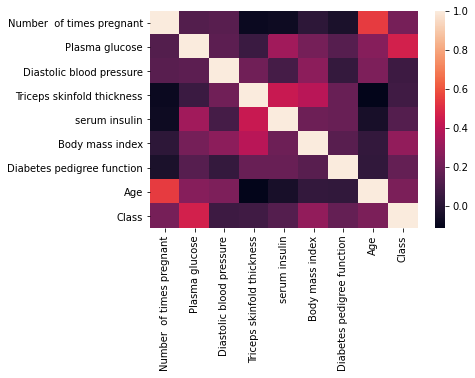

In [5]:
sns.heatmap(data.corr())

In [6]:
data.shape

(768, 9)

In [7]:
x=data.drop("Class",axis=1)
y=data["Class"]

In [8]:
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [9]:
data['Class'].value_counts()

0    500
1    268
Name: Class, dtype: int64

1. Because there is a 2:1 ratio in this dataset(balanced), metrics such as accuracy, ROC, and AUC curves can be used.
2. We don't need PCA because we have fewer columns (i.e.,Dimensionality reduction is not required)
3. I would prefer recall as diabetis persons should not be missed

### Split data

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)

print("X Train sample size ",x_train.shape[0])
print("X Test sample size ",x_test.shape[0])

print("Y Train sample size ",y_train.shape[0])
print("Y Test sample size ",y_test.shape[0])

X Train sample size  614
X Test sample size  154
Y Train sample size  614
Y Test sample size  154


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

modeling_pipeline = Pipeline([('Standard Scalar', StandardScaler()),
                              ('LogisticRegression', LogisticRegression())])


pipeline = modeling_pipeline.fit(x_train, y_train)
pipeline

Pipeline(steps=[('Standard Scalar', StandardScaler()),
                ('LogisticRegression', LogisticRegression())])

### Predictions

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score

In [13]:
#Confusion metrics

y_test_pred = pipeline.predict(x_test)
print(confusion_matrix(y_test, y_test_pred))

[[98  9]
 [18 29]]


In [14]:
#Accuracy score

accuracy=accuracy_score(y_test, y_test_pred)
accuracy

0.8246753246753247

In [15]:
#Recall score

recall=recall_score(y_test, y_test_pred)
recall

0.6170212765957447

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



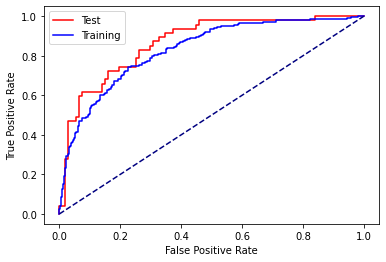

In [17]:
#ROC Curve

from sklearn.metrics import roc_curve

def generate_probs(X, model=pipeline):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(x_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(x_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [18]:
#AUC Curve

from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test, generate_probs(x_test))
print("Area of curve",score)

Area of curve 0.8661761781666335


The ROC curve has a percentage of higher than 50%, indicating that this is a good model.

In [19]:
from sklearn.model_selection import cross_validate,cross_val_score,GridSearchCV,StratifiedKFold,KFold

### Grid Search Cross validation

In [46]:
params = {'LogisticRegression__C': [0.1,0.5,1,2,5],
          'LogisticRegression__solver':['liblinear','sag'],
          'LogisticRegression__penalty':['l2'],
          'LogisticRegression__class_weight':[None,'balanced'],
         }
gcv_results = GridSearchCV(estimator=modeling_pipeline,param_grid=params,scoring='recall',cv=10)
gcv_results.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Standard Scalar', StandardScaler()),
                                       ('LogisticRegression',
                                        LogisticRegression())]),
             param_grid={'LogisticRegression__C': [0.1, 0.5, 1, 2, 5],
                         'LogisticRegression__class_weight': [None, 'balanced'],
                         'LogisticRegression__penalty': ['l2'],
                         'LogisticRegression__solver': ['liblinear', 'sag']},
             scoring='recall')

In [47]:
for i in gcv_results.cv_results_.keys():
    print(i)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_LogisticRegression__C
param_LogisticRegression__class_weight
param_LogisticRegression__penalty
param_LogisticRegression__solver
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
split5_test_score
split6_test_score
split7_test_score
split8_test_score
split9_test_score
mean_test_score
std_test_score
rank_test_score


In [48]:
gcv_results.best_score_

0.7110671936758892

In [49]:
gcv_results.best_params_

{'LogisticRegression__C': 2,
 'LogisticRegression__class_weight': 'balanced',
 'LogisticRegression__penalty': 'l2',
 'LogisticRegression__solver': 'liblinear'}

In [50]:
from sklearn.metrics import confusion_matrix

y_test_pred = gcv_results.predict(x_test)
print(confusion_matrix(y_test, y_test_pred))

[[82 25]
 [10 37]]


In [51]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82       107
           1       0.60      0.79      0.68        47

    accuracy                           0.77       154
   macro avg       0.74      0.78      0.75       154
weighted avg       0.80      0.77      0.78       154



In [52]:
accuracy=accuracy_score(y_test, y_test_pred)
accuracy

0.7727272727272727

In [53]:
#Recall score

recall=recall_score(y_test, y_test_pred)
recall

0.7872340425531915

In [54]:
kf_results = cross_validate(modeling_pipeline, x_train, y_train, scoring=['accuracy','roc_auc'], cv=10)
kf_results

{'fit_time': array([0.0178051 , 0.01071572, 0.00745487, 0.00599241, 0.00540996,
        0.00463486, 0.00441599, 0.00378919, 0.00365376, 0.00365424]),
 'score_time': array([0.00695205, 0.00560522, 0.00418091, 0.00334477, 0.00278997,
        0.00252104, 0.00234532, 0.00215983, 0.00215197, 0.00214982]),
 'test_accuracy': array([0.72580645, 0.75806452, 0.83870968, 0.75806452, 0.70491803,
        0.78688525, 0.73770492, 0.67213115, 0.80327869, 0.78688525]),
 'test_roc_auc': array([0.8238573 , 0.81363636, 0.87727273, 0.83181818, 0.80652681,
        0.85431235, 0.84149184, 0.71445221, 0.88694639, 0.81701632])}

# Observations

- Regularization strengths : 0.1,0.5,1,2,5(Smaller regularization strengths are more stronger)
- Solvers : liblinear(Works better for smaller datasets), sag
- As this data falls under recall metrics, accuracy got decreased and recall got increased to 61% to 78% after applying GridSearchCV

# Extensions

### K Fold Cross validation

In [55]:
kfold=KFold(10)
kf_scores=cross_val_score(modeling_pipeline, x_train, y_train,cv=kfold)
print(kf_scores)

[0.77419355 0.69354839 0.85483871 0.74193548 0.70491803 0.72131148
 0.75409836 0.73770492 0.7704918  0.83606557]


In [56]:
print("Average accuracy with KFold: ",kf_scores.mean())
print("Minimum accuracy: ",kf_scores.min())
print("Maximum accuracy: ",kf_scores.max())

Average accuracy with KFold:  0.7589106292966685
Minimum accuracy:  0.6935483870967742
Maximum accuracy:  0.8548387096774194


### Stratified K Fold Cross Validation

In [57]:
skfold = StratifiedKFold(n_splits=10)
skf_scores=cross_val_score(modeling_pipeline, x_train, y_train,cv=skfold)
print(skf_scores)

[0.72580645 0.75806452 0.83870968 0.75806452 0.70491803 0.78688525
 0.73770492 0.67213115 0.80327869 0.78688525]


In [58]:
print("Average accuracy with Stratified KFold: ",skf_scores.mean())
print("Minimum accuracy: ",skf_scores.min())
print("Maximum accuracy: ",skf_scores.max())

Average accuracy with Stratified KFold:  0.7572448439978847
Minimum accuracy:  0.6721311475409836
Maximum accuracy:  0.8387096774193549
